In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_a = pd.read_csv('groupA.txt', header = None)
df_a.columns = ['X','Y','Class']
print(df_a.describe())
df_a.head()

                 X            Y        Class
count  4000.000000  4000.000000  4000.000000
mean      5.499685   142.548211     0.500000
std       0.512226    12.927202     0.500063
min       4.653274   120.556487     0.000000
25%       5.000621   129.905447     0.000000
50%       5.483045   143.322690     0.500000
75%       6.002560   155.150031     1.000000
max       6.324108   165.692925     1.000000


,X,Y,Class
0,5.902690,153.389468,0
1,6.080165,149.538040,0
2,5.855379,150.903728,0
3,6.075475,154.077386,0
4,5.976990,158.264022,0


In [3]:
df_b = pd.read_csv('groupB.txt', header = None)
df_b.columns = ['X','Y','Class']
df_b.head()
print(df_b.describe())

                 X            Y        Class
count  4000.000000  4000.000000  4000.000000
mean      5.851324   145.040664     0.500000
std       0.179523     5.827764     0.500063
min       5.307474   130.279556     0.000000
25%       5.700070   140.046063     0.000000
50%       5.846893   144.913972     0.500000
75%       6.000146   150.063866     1.000000
max       6.338235   159.844399     1.000000


In [4]:
df_c = pd.read_csv('groupC.txt', header = None)
df_c.columns = ['X','Y','Class']
df_c.head()

,X,Y,Class
0,6.044565,152.213673,0
1,6.070798,147.165263,0
2,5.960693,146.427733,0
3,5.980587,149.284117,0
4,6.026399,150.089632,0


In [5]:
def normalize(df):
    xmin = df['X'].min()
    xmax = df['X'].max()
    ymin = df['Y'].min()
    ymax = df['Y'].max()
    df['X']=df['X'].apply(lambda x: (x-xmin)/(xmax-xmin))
    df['Y']=df['Y'].apply(lambda y: (y-ymin)/(ymax-ymin))
#     df['Class'] = df['Class'].apply(lambda x: 1 if x == 1 else -1)

In [6]:
normalize(df_a)
normalize(df_b)
normalize(df_c)

In [7]:
def hard_activation(weights, x, gain):
    net = sum([x*y for x, y in zip(weights[:-1],x)]) + weights[len(weights)-1]
#     print('Net', net)
    if net < 0:
        return 0
    return 1

In [8]:
def update_weights(weights, learning_rate, output, desired, current_row):
#     print('Desired',desired)
#     print('multiple',learning_rate * (desired-output))
    increment = [learning_rate * x * (desired-output) for x in current_row[:-1]]
    increment.append(learning_rate*(desired-output))
    updated = [x+y for x,y in zip(weights, increment)]
#     print('Updated',updated)
    return updated
    

In [9]:
import math
def soft_activation(weights, x, gain):
    net = sum([x*y for x, y in zip(weights[:-1],x)]) + weights[len(weights)-1]
#     print('Net:',net)
    return 1/(1+math.exp(-gain*net))
    

In [10]:
import random
import sys
def train_perceptron(learning_rate, df, max_iterations, error_threshold, activation, gain =None):
    weights = [random.uniform(-.5,.5)] * (df.shape[1])
#     weights = [1, 3, -3]
    print('Initial Weights: ', weights)
    for x in range(max_iterations):
        error = 0
        print('______________________________________________\n\nEpoch: ',x)
        for i in range(len(df)):
            current_point = df.iloc[i]
#             print('Sample: ',list(current_point))
#             print('Weights: ',weights)
#             output = hard_activation(weights,current_point[['X','Y']].values)
            output = activation(weights, current_point[['X','Y']].values,gain)
            weights = update_weights(weights, learning_rate, output, current_point['Class'],current_point)

            error += (current_point['Class']-output)**2
#             print('Error',error, 'Expected', current_point['Class'], 'Output', output,'\n')
        print('Total Error: ',error)
        print('Weights: ',weights)
        if error <= error_threshold:
            return weights
    return weights


In [35]:
def confusionMatrix(df, x_list, y_list):
    x1 = x_list[0]
    x2 = x_list[1]
    y1 = y_list[0]
    y2 = y_list[1]
    m = (y2-y1)/(x2-x1)
    df['prediction'] = df.apply(lambda x: predict(x['X'], x['Y'], x1, y1, m),axis=1)
    df['tp'] = df.apply(lambda x: x['prediction'] == x['Class'] and x['Class'] == 1, axis = 1)
    df['tn'] = df.apply(lambda x: x['prediction'] == x['Class'] and x['Class'] == 0, axis = 1)
    df['fp'] = df.apply(lambda x: x['prediction'] != x['Class'] and x['Class'] == 0, axis = 1)
    df['fn'] = df.apply(lambda x: x['prediction'] != x['Class'] and x['Class'] == 1, axis = 1)
    tp,tn,fp,fn=sum(df['tp']), sum(df['tn']),sum(df['fp']),sum(df['fn'])
    return 1- ((tp+tn)/(tp+tn+fp+fn))

In [36]:
def predict(x_data, y_data, x_line, y_line, m):
    y_expected = m*(x_data-x_line) + y_line
    if y_expected < y_data:
        return 0
    return 1

In [38]:
def plotGraph(df,weights, group):
    x_plot = []
    y_plot = []
    x_plot.append(0)
    x_plot.append(1)
    y_plot.append(-weights[2]/weights[1])
    y_plot.append((-weights[2]-weights[0])/ weights[1])
    print(confusionMatrix(df, x_plot, y_plot))
    color = ['blue','red']
    labels = ['Men','Women']
    for i in range(2):
        plt.scatter(df[df['Class'] == i]['X'].values,df[df['Class'] == i]['Y'].values, color = color[i],label = labels[i])
    plt.title('Height vs. Weight for Group ' +group)
    plt.xlabel('Height in Feet')
    plt.ylabel('Weight in Pounds')
    plt.legend(loc='upper right')
    plt.plot(x_plot, y_plot)

# Group A Perceptron Training

## Hard Activation 

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_a, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 10**-5, hard_activation,0.1)

Initial Weights:  [-0.4920942369325312, -0.4920942369325312, -0.4920942369325312]
______________________________________________

Epoch:  0
Total Error:  72.0
Weights:  [-0.343696408663349, -0.34098096014512147, 0.22790576306746918]
______________________________________________

Epoch:  1
Total Error:  0.0
Weights:  [-0.343696408663349, -0.34098096014512147, 0.22790576306746918]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.0


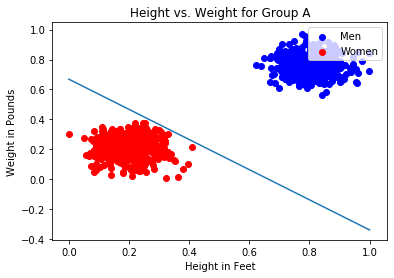

In [40]:
plotGraph(test, weights, "A")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.0


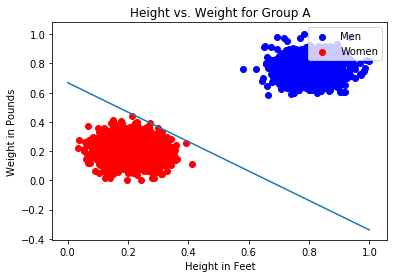

In [41]:
plotGraph(train,weights,"A",)

## Soft Activation Function

In [42]:
train, test = train_test_split(df_a, test_size=0.25)
weights = train_perceptron(15, train, 5000, 10**-5, soft_activation,2.5)

Initial Weights:  [0.45476742101748613, 0.45476742101748613, 0.45476742101748613]
______________________________________________

Epoch:  0
Total Error:  6.833070232102125
Weights:  [-18.017244824367385, -19.789027241013045, 18.809306073275664]
______________________________________________

Epoch:  1
Total Error:  4.226206529697032e-11
Weights:  [-18.01733130757159, -19.78910235844526, 18.809188526260584]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.0


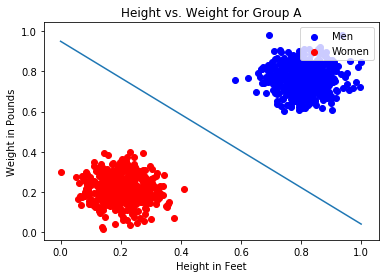

In [43]:
plotGraph(test, weights, "A")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.0


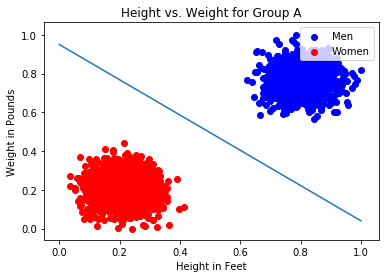

In [44]:
plotGraph(train, weights, "A")

# Group B Perceptron Training

## Hard Activation Function

In [45]:
train, test = train_test_split(df_b, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 100, hard_activation,0.1)


Initial Weights:  [-0.1800459689176349, -0.1800459689176349, -0.1800459689176349]
______________________________________________

Epoch:  0
Total Error:  89.0
Weights:  [-0.08702523447002497, -0.0926593153686152, 0.0899540310823651]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.013000000000000012


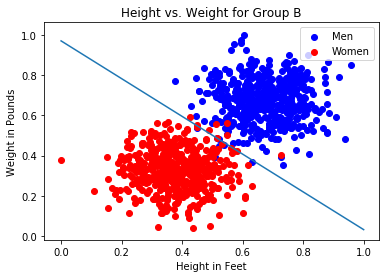

In [46]:
plotGraph(test, weights, "B")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.01200000000000001


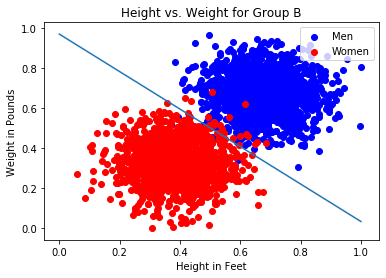

In [47]:
plotGraph(train,weights,"B",)

## Soft Activation Function

In [48]:
train, test = train_test_split(df_b, test_size=0.25)
weights = train_perceptron(10, train, 5000, 100, soft_activation,0.1)

Initial Weights:  [-0.418713490481885, -0.418713490481885, -0.418713490481885]
______________________________________________

Epoch:  0
Total Error:  75.62120134383687
Weights:  [-144.05183414193198, -163.06888605577515, 160.5699283301418]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.007000000000000006


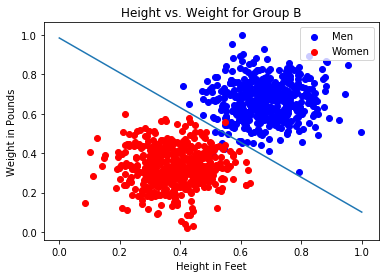

In [49]:
plotGraph(test, weights, "B")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.01533333333333331


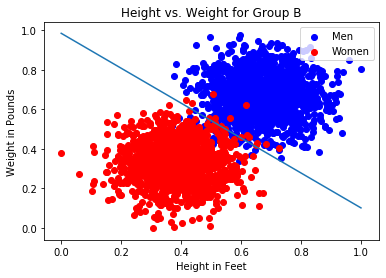

In [50]:
plotGraph(train, weights, "B")

# Group C Perceptron Training

## Hard Activation Function

In [51]:
train, test = train_test_split(df_c, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, hard_activation,0.1)

Initial Weights:  [0.09024983547199739, 0.09024983547199739, 0.09024983547199739]
______________________________________________

Epoch:  0
Total Error:  1131.0
Weights:  [-0.04520707258435907, -0.015279896752721206, 0.020249835471997386]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.4378057302585604


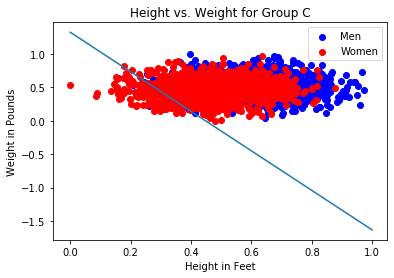

In [52]:
plotGraph(train, weights, "C")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.4429319371727749


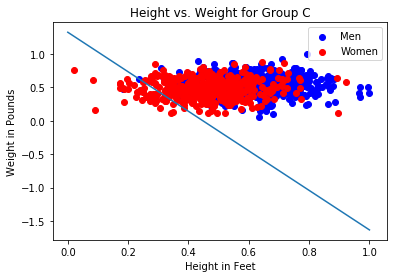

In [53]:
plotGraph(test, weights, "C")

## Soft Activation Function

In [54]:
train, test = train_test_split(df_c, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, soft_activation,10)

Initial Weights:  [-0.13020372246030443, -0.13020372246030443, -0.13020372246030443]
______________________________________________

Epoch:  0
Total Error:  623.0386132865387
Weights:  [-0.45730951914506923, -0.11800012759056829, 0.29148570369355153]


/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.29070580013976244


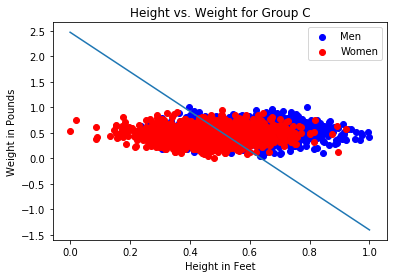

In [55]:
plotGraph(train, weights, "C")

/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bvenkat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

0.2827225130890052


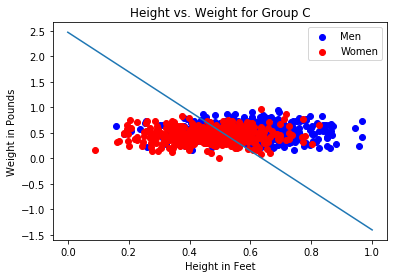

In [56]:
plotGraph(test, weights, "C")